Code for Speech in TaiTung

Author: [蔡岳霖](https://www.facebook.com/profile.php?id=100002152027860) 

<span style="color: red; font-size: 40px;">server IP: 210.240.162.7:8080<br>
passwd: mlisfun</span>

![our dataset](https://www.tensorflow.org/images/mnist_digits.png)
![workflow](https://guillaumebrg.files.wordpress.com/2016/01/mnist_and_mlp1.png)

In [475]:
###### import modules we need ######

%matplotlib inline
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

import tensorflow as tf
from scipy import stats
sess = tf.InteractiveSession()

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


### Pre-processing (TensorFlow already normalized)
> Machine Learning standard steps <br>
> 1. collect data <br>
    >>一個好的 data 會決定你的 model 的好壞，如何根據模型的實際應用場景去決定我們要使用怎樣的 data 才是最重要的
> 2. preprocess data <br>
    >>實際操作 data 的時候可能會發生很多的問題:
    * 資料缺失: 在資料內有很多的缺失，可能是 data 收集上的問題或是很多很多其他的問題
    * 資料清洗: 如何在所收集到的資料內剔除我們不需要的資料
    <img src="./bias_dataset.png" alt="bias_dataset" style="width: 400px;"/>
> 3. transform data <br>
    >>每一維的 data 尺度可能不太一樣
    <img src="https://sebastianraschka.com/images/blog/2014/about_standardization_normalization/about_standardization_normalization_89_0.png" alt="normalization" style="width: 400px">

[註]因為 tensorflow 提供給我們的 dataset 是已經經過 scaled 所以我們把乘回來去模擬沒有經過預處理的資料
1. without preprocessing (train \*= 255, test \*= 255)
2. with preprocessing (Tensorflow already done!)
3. zscoring i.e. standardization 
$$z=\frac{x-mean}{std}$$
[results](#result_cell)

In [476]:
def preprocessing(data):
    ### with Min-Max scaling
    return data

    ### without preprocessing ###
    data = data * 255
    return data
    
    ### zscore
    data = stats.zscore(data, axis=1, ddof=1)
    return data

Network structure
> 理論上變數越多會越更大的能力去描繪一個抽象狀態，再者模型的結構代表的是你可以從上一層得到的資訊量
> 1. inverted triangle shape:
    * set n_node_in_NN = [64, 1024]
    * 倒三角形的模型結構會有的效果是資訊的量逐漸擴大所以在目前的應用上較不適合 [註]相較於 auto-encoder
> 2. pyramid shape:
    * set n_node_in_NN = [64, 32]
    * 逐漸透過模型的架構去做到壓縮有效資訊的效果，萃取出對於分類最有效的資訊，相較於第一種的倒三角形則提供了很多自己生成的無謂雜訊
> 3. shallow shape:
    * set n_node_in_NN = [64]
    * 可以看到之前說的色鉛筆的例子，這裡只用一層沒辦法像第二種那麼有能力的描繪抽象特徵
> 4. fat shape: optional
    * set n_node_in_NN = [96]
    * 同樣的變數量可以明顯看到 <font color="red">胖胖網路</font> 就比 <font color="red">深度網路</font> 來的沒那麼有能力

In [477]:
### A group inverted triangle shape ### 
# n_node_in_NN = [64, 1024]
### B group pyramid shape ###
# n_ndoe_in_NN = [64, 32]
### C group shallow network structure ###
n_node_in_NN = [64]

### Activation Function
> 激發函數的差異
> 1. Sigmoid function:
    >> 
    ```python
    activation_function = tf.sigmoid
    ```
    >> * risk of 'gradient vanishing'
    >> <img src="https://cdn-images-1.medium.com/max/800/1*8JJ6sYleUtvUZR7TOyyFVg.png" style="width: 450px">
    >> <img src="http://www.ai-junkie.com/ann/evolved/images/sigmoid.jpg" style="width: 200px">
    >> ----------------
    >> [註] there is also 'gradient explosion'
    >> It often occur in RNN training
    >> <img src="http://kordinglab.com/lab_teaching_2016/session_6/images/cliff.png" style="width: 400px">
> 2. ReLU:
    >> 
    ``` python
    activation_function = tf.nn.relu
    ```
    >> * design for solving vanishing gradient
    >> * But!! it is not differentiable
    >> <img src="http://cs231n.github.io/assets/nn1/relu.jpeg" style="width: 300px">
> 3. tanh:
    >>
    ``` python
    activation_function = tf.tanh
    ```
    >> notice the upper bond and lower bound
    >> <img src="http://mathworld.wolfram.com/images/interactive/TanhReal.gif" style="width: 300px">

In [478]:
### A group use sigmoid function ### 
# activation_function = tf.sigmoid
### B group use ReLU ###
activation_function = tf.nn.relu
### C group use hyperbolic tangent ###
# activation_function = tf.tanh

### Loss Function
> 測量錯誤的方式
> 1. cross entropy
> <img src="https://i.stack.imgur.com/gYMhc.png" style="width: 500px">
> 2. mean square error
> <img src="http://www.aoml.noaa.gov/hrd/Landsea/artificial/equa-4" style="width: 300px">
[here to change code](#cost_function_cell)

### Dropout
> Methods of preventing overfitting
> 隨機的拔掉一些 weighting 使模型不至於太過依賴一些固定的抽象特徵
<img src="https://raw.githubusercontent.com/stdcoutzyx/Blogs/master/blogs/imgs/n7-1.png" style="width: 450px">

In [479]:
### A group dropout = 0.1 ### 
#dropout = 0.1
### B group dropout = 0.5 ###
#dropout = 0.5
### C group dropout = 0.9 ###
dropout = 0.9

### Regularization
> another method to prevent from overfitting
<img src="https://image.slidesharecdn.com/multinomialclassificationapplicationofml-170117162000/95/multinomial-classification-and-application-of-ml-38-638.jpg?cb=1484670145" style="width: 700px">

In [480]:
beta = 0.001
### A group l1 regularization beta = 0.001 ### 
#regularizer = tf.contrib.layers.l1_regularizer(scale=beta)
### B group l2 regularization beta = 0.001 ###
#regularizer = tf.contrib.layers.l2_regularizer(scale=beta)
### C group l2 regularization beta = 0.1 ###
regularizer = tf.contrib.layers.l2_regularizer(scale=beta)

### Learning Rate
> 代表在找尋極值的過程中一步的大小
> 1. learning_rate = 0.1
> 2. learning_rate = 0.5
> 3. learning_rate = 0.05
<img src="https://image.slidesharecdn.com/dl-161220080238/95/learning-deep-learning-36-638.jpg?cb=1482221026" style="width: 450px">

In [481]:
### A group learning = 0.001 ### 
# learning_rate = 0.001
### B group dropout = 0.05 ###
learning_rate = 0.05
### C group dropout = 0.5 ###
# learning_rate = 0.5

### Mini Batch
> how often do we update weightings
> 1. batch_size = 128
> 2. batch_size = 256
> 3. batch_size = 512

In [482]:
### A group batch_size = 128 ### 
batch_size = 128
### B group batch_size = 256 ###
# batch_size = 256
### C group batch_size = 512 ###
# batch_size = 512

In [483]:
def add_layer(input_tensor, input_size, output_size, activation_function=None, dropout=None):
    weights = tf.Variable(tf.random_normal([input_size, output_size], ))
    biases = tf.Variable(tf.random_normal([output_size],))
    w_plus_b = tf.add(tf.matmul(input_tensor, weights), biases)
    outputs = w_plus_b
    if activation_function is not None:
        outputs = activation_function(w_plus_b)
    if dropout is not None:
        outputs = tf.nn.dropout(outputs, dropout)
    return outputs, weights

def multilayer_perceptron(input_tensor, n_features_in_layer, dropout):
    global regularizer
    global activation_function
    global w_list
    n_input = 784
    n_classes = 10
    activation_function = tf.nn.relu
    assert len(n_features_in_layer) > 0
    w_list = []
    temp, weight = add_layer(input_tensor, n_input, n_features_in_layer[0], activation_function, dropout)
    w_list.append(weight)
    for index, layer in enumerate(n_features_in_layer[0:-1]):
        temp, weight = add_layer(temp, layer, n_features_in_layer[index + 1], activation_function, dropout)
        w_list.append(weight)
    output, weight = add_layer(temp, n_features_in_layer[-1], n_classes, activation_function=None, dropout=None)
    w_list.append(weight)
    reg_penalty = tf.contrib.layers.apply_regularization(regularizer, w_list)
    return output, reg_penalty, w_list
    

In [484]:
def compute_accuracy(v_xs, v_ys):
    global pred
    global w_list
    y_pre = sess.run(pred, feed_dict={x: v_xs, keep_prob: 1.})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={x: v_xs, y: v_ys})
    return result

In [485]:
# Network Parameters
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)


In [486]:
# Parameters
training_epochs = 15
display_step = 1

# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])
keep_prob = tf.placeholder(tf.float32)

x = tf.py_func(preprocessing, [x], tf.float32)


# Construct model
pred, reg_penalty, w_list = multilayer_perceptron(x, n_node_in_NN, keep_prob)

# Define loss and optimizer

<a id="cost_function_cell"></a>
Change cost function here

In [487]:
#### here to decide which loss function to apply ###
## group A & C cross entropy
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y)+ reg_penalty)
## group B mean square error
# cost = tf.reduce_mean(tf.losses.mean_squared_error(predictions=pred, labels=y))

In [488]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
#with tf.Session() as sess:
sess.run(init)

# Training cycle
batch_cost = []
for epoch in range(training_epochs):
    avg_cost = 0.
    total_batch = int(mnist.train.num_examples/batch_size)
    # Loop over all batches
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop) and cost op (to get loss value)
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})
        avg_cost += c / total_batch
    # Display logs per epoch step
    if epoch % display_step == 0:
        batch_cost.append(avg_cost)
        print("Epoch:", '%04d' % (epoch+1), "cost=", \
            "{:.9f}".format(avg_cost))
print("Optimization Finished!")


print("Accuracy:", compute_accuracy(mnist.test.images, mnist.test.labels))

Epoch: 0001 cost= 6.304539429
Epoch: 0002 cost= 0.832640138
Epoch: 0003 cost= 0.656302478
Epoch: 0004 cost= 0.676294748
Epoch: 0005 cost= 0.709306080
Epoch: 0006 cost= 0.757234528
Epoch: 0007 cost= 0.725782213
Epoch: 0008 cost= 0.704050334
Epoch: 0009 cost= 0.714715863
Epoch: 0010 cost= 0.718932539
Epoch: 0011 cost= 0.734104404
Epoch: 0012 cost= 0.708571706
Epoch: 0013 cost= 0.724175113
Epoch: 0014 cost= 0.690640020
Epoch: 0015 cost= 0.724696021
Optimization Finished!
Accuracy: 0.8957


<a id="result_cell"></a>
here is the result

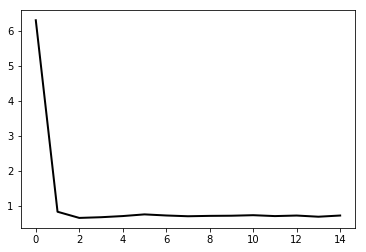

In [489]:
batch_cost = np.array(batch_cost)
batch = np.arange(0, len(batch_cost), 1)
plt.plot(batch, batch_cost, 'k-', lw=2)